# **THE TRUTH IS OUT THERE 2°parte**

Tomaremos los datos ya limpios de UFO sightings y haremos algunas visualizaciones<br>
Es un registro de avistamientos de OVNI llevado a cabo por National UFO Reporting Center (NUFORC)<br>
Contiene registros de avistamientos desde 1906 hasta 2014<br>
1° Parte: https://www.kaggle.com/leogenzano/ufo-sightings-1-parte-data-preparation<br>

Consideraciones:
* para ver el código, presiona el botón Code que esta arriba a la derecha de cada visualización. Lo oculto para que no se haga largo el notebook
* voy a estar utilizando algunas funciones de la libreria funpymodeling, que nos ayuda sobretodo con el analisis exploratorio y la preparación de datos https://pypi.org/project/funpymodeling/
* Este notebook no fue realizado por un experto. Seguramente haya mejores maneras de afrontar las mismas problematicas. Quedo atento a cualquier comentario o sugerencia 

![The kaggle logo][1]
[1]: https://i.pinimg.com/originals/e2/6a/04/e26a047ca4b432efb62f63534ae9e8b9.jpg

In [1]:
#Importamos librerias que vamos a utilizar y cargamos los datos limpios en un dataframe**

In [2]:
pip install funpymodeling

     |████████████████████████████████| 215 kB 493 kB/s 
     |████████████████████████████████| 11.6 MB 8.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 7.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pandas-profiling 2.6.0 requires matplotlib>=3.2.0, but you'll have matplotlib 3.1.3 which is incompatible.
osmnx 0.15.1 requires matplotlib>=3.2, but you'll have matplotlib 3.1.3 which is incompatible.
funpymodeling 0.1.7 requires matplotlib<4.0.0,>=3.2.2, but you'll have matplotlib 3.1.3 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars
from qgrid import show_grid
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import YouTubeVideo
import squarify

In [5]:
# Cargamos los datos ya trabajados
data = pd.read_csv("../input/clean-data-ufo/clean Data UFO (10).csv", sep=",")

# Análisis inicial

Variables de los datos
* datetime: fecha y hora del avistamiento
* country: país
* state: estado/provincia/region
* city: ciudad
* shape: forma del ovni
* duration(minutes): duración en minutos del avistamiento
* comments: descripción 
* datePosted: fecha en que fue cargado el registro
* latitude & longitude: coordenadas geográficas

Veamos como estan distribuidos los países. 

In [6]:
freq_tbl(data['country'])
# como era de esperarse, Estados Unidos tiene el 88% de los registros
#tenemos 164 países

,country,frequency,percentage,cumulative_perc
0,USA,70903,0.882636,0.882636
1,Canada,3588,0.044665,0.927301
2,United Kingdom,2387,0.029715,0.957015
3,Australia,633,0.007880,0.964895
4,Mexico,236,0.002938,0.967833
...,...,...,...,...
159,Georgia,1,0.000012,0.999950
160,Sao Tome and Principe,1,0.000012,0.999963
161,Solomon Isds,1,0.000012,0.999975
162,Papua New Guinea,1,0.000012,0.999988


Tenemos en total 164 países<br>
Como era de esperarse, Estados Unidos esta primero, con casi el 90% de los datos<br>
Esto ocurre porque los datos estan relevados por NUFORC, que es de Estados Unidos

*******************

*******************

# Avistamientos por períodos de tiempo

In [7]:
# vamos a tomar el año, mes, dia y hora a partir de la columna datetime
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day
#data['hour'] = pd.DatetimeIndex(data['datetime']).time #este devuelve la hora y minutos
data['hour'] = pd.DatetimeIndex(data['datetime']).hour #este devuelve solo la hora

In [8]:
#declaramos formato global de matplotlib
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

#https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties.set_size

In [9]:
#vamos a hacer divisiones cada 40 años para que sea legible
dt_year_1900_1949= data.loc[(data['year'] >= 1900) & (data['year'] <= 1949)]
dt_year_1940_1979= data.loc[(data['year'] >= 1950) & (data['year'] <= 1979)]
dt_year_1980_2020= data.loc[(data['year'] >= 1980) & (data['year'] <= 2020)]

**Entre 1900-1939<br>**
Como diría el canal de Youtube 'Te lo resumo asi nomas'     DATO DE VITAL IMPORTANCIA <br>
Aumentaron los avistamientos en los años:<br>
* 1938: transmisión de radio de "La guerra de los mundos" https://es.wikipedia.org/wiki/La_guerra_de_los_mundos_(radio)
* 1942: la batalla de los Angeles https://es.wikipedia.org/wiki/Batalla_de_Los_%C3%81ngeles_(1942)
* 1947: Incidente Roswell https://es.wikipedia.org/wiki/Caso_Roswell
* 1939-1945: 2° guerra mundial

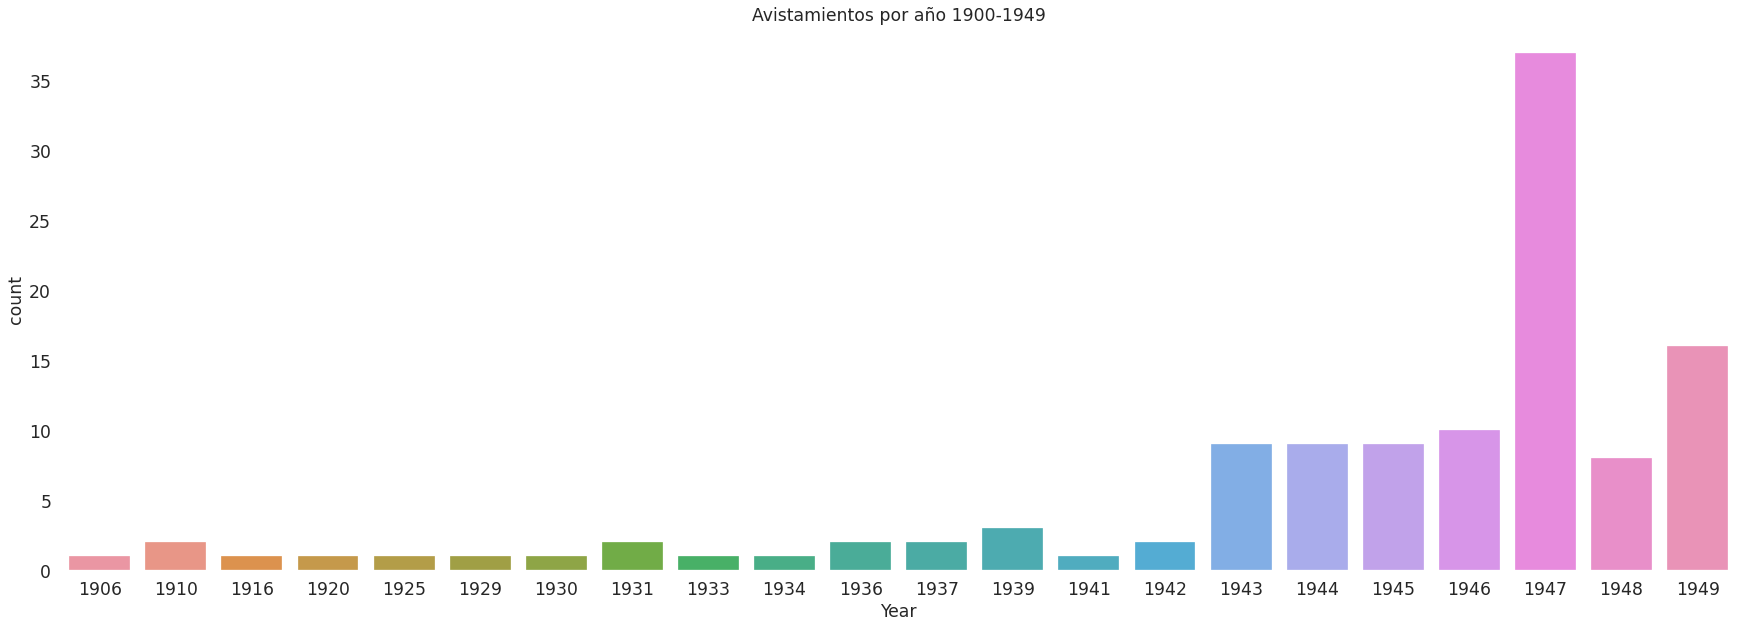

In [10]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1900_1949['year'])
plt.title('Avistamientos por año 1900-1949')
plt.xlabel('Year')
plt.show()

**Entre 1940-1979**

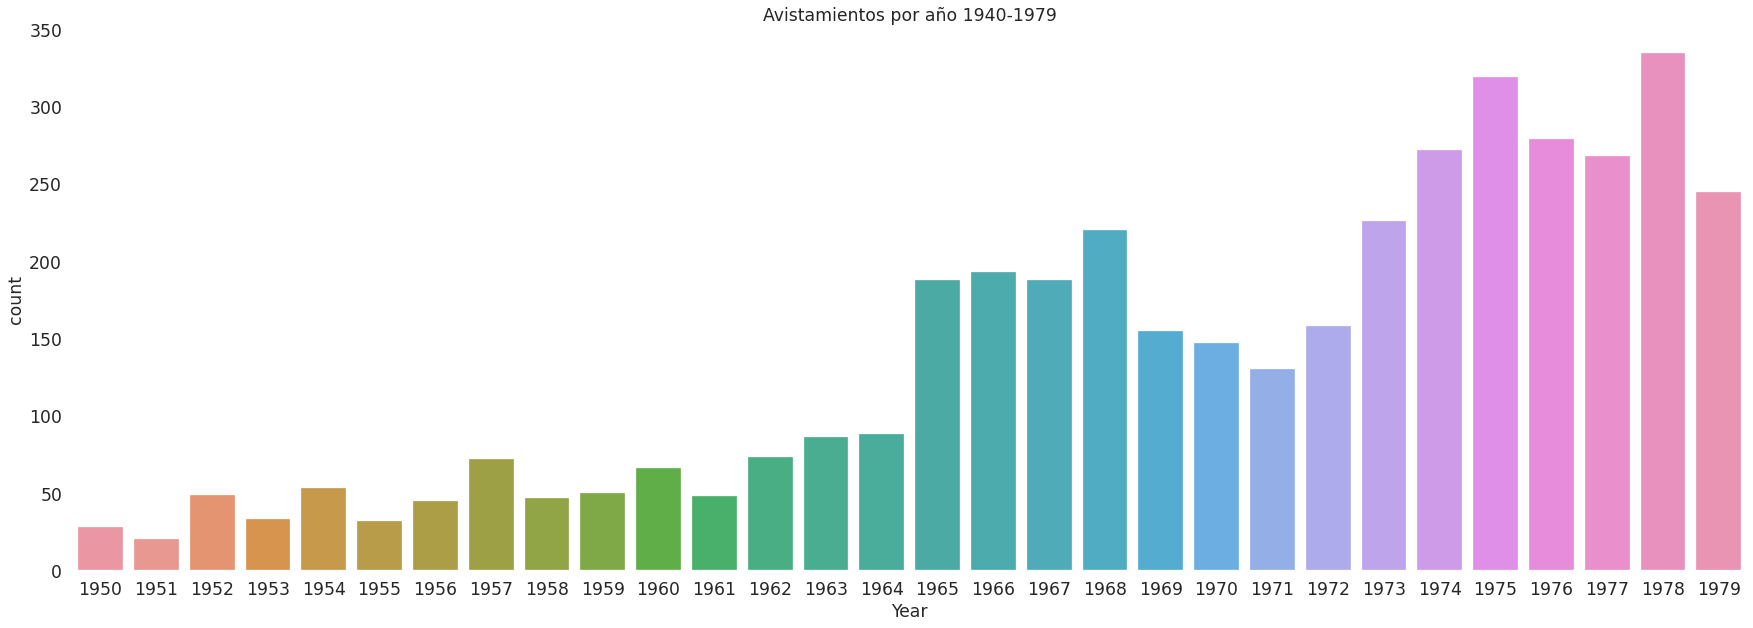

In [11]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1940_1979['year'])
plt.title('Avistamientos por año 1940-1979')
plt.xlabel('Year')
plt.show()

**Entre 1980-2020**<br>
Atención con como aumentaron los avistamientos segun:
* 1994: Comienzo de una de las series pioneras en generar el famoso "hype", obviamente trata de ovnis: X-files 
* 2012: fin del mundo segun el calendario maya (o fin de una era..) Al final lo habian calculado mal
Oficialmente 2012 se lleva la medalla a la mayor cantidad de avistamientos

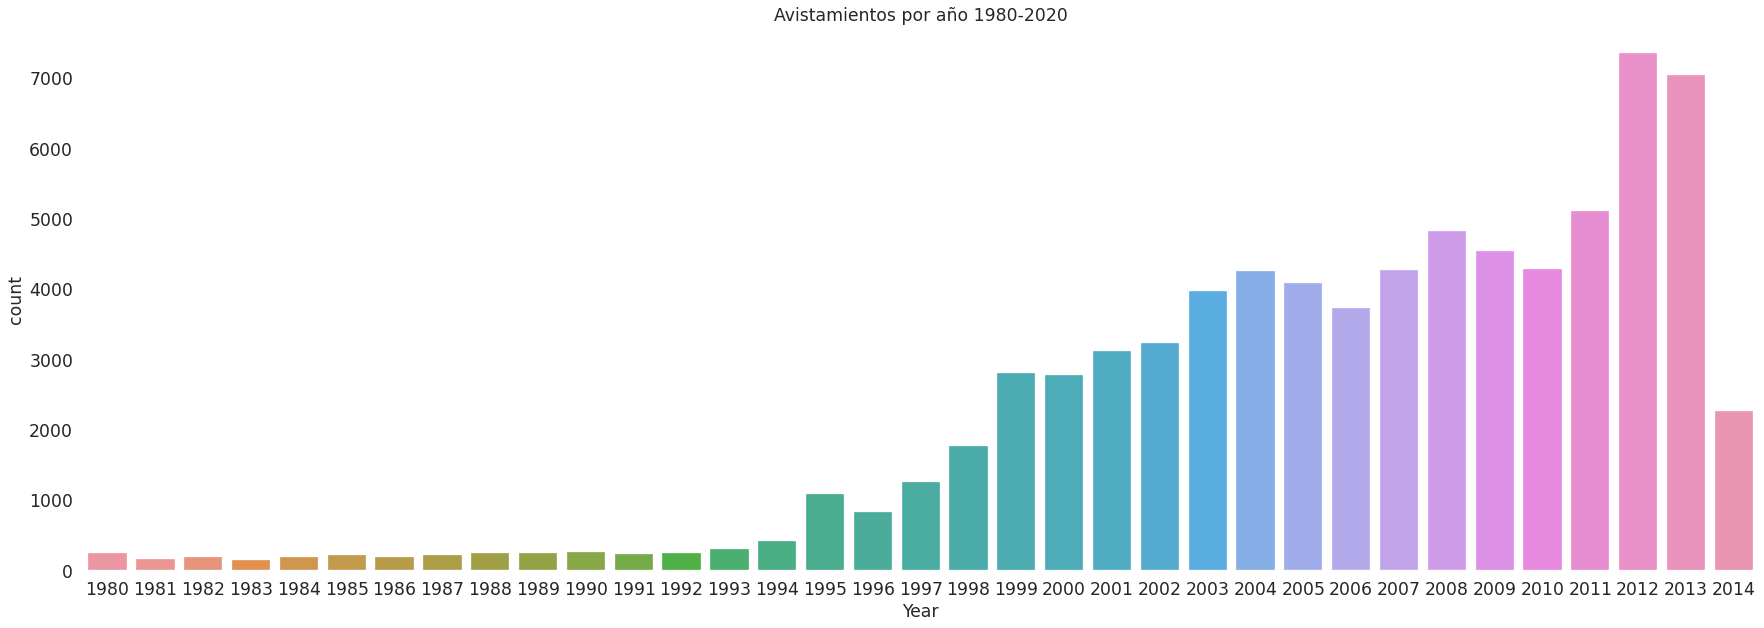

In [12]:
plt.figure(figsize=(30,10))
sns.countplot(x=dt_year_1980_2020['year'])
plt.title('Avistamientos por año 1980-2020')
plt.xlabel('Year')
plt.show()

**************************

# ¿Hay algun mes o día en donde los avistamientos aumenten?

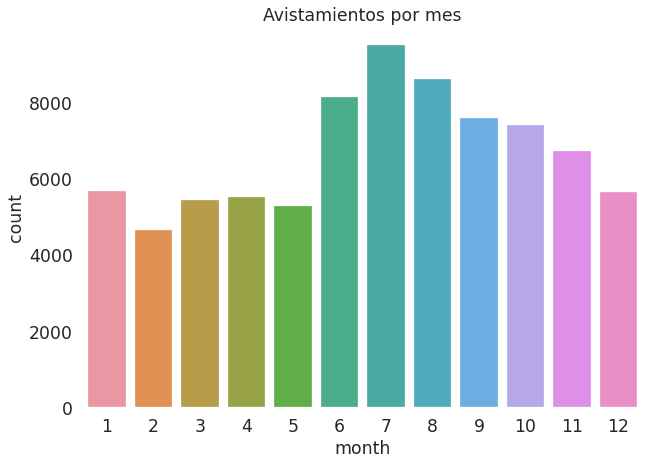

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['month'])
plt.title('Avistamientos por mes')
plt.show()

![The kaggle logo][1]
[1]: https://img.europapress.es/fotoweb/fotonoticia_20160104180748_420.jpg

# Veamos que pasa con el día y la hora

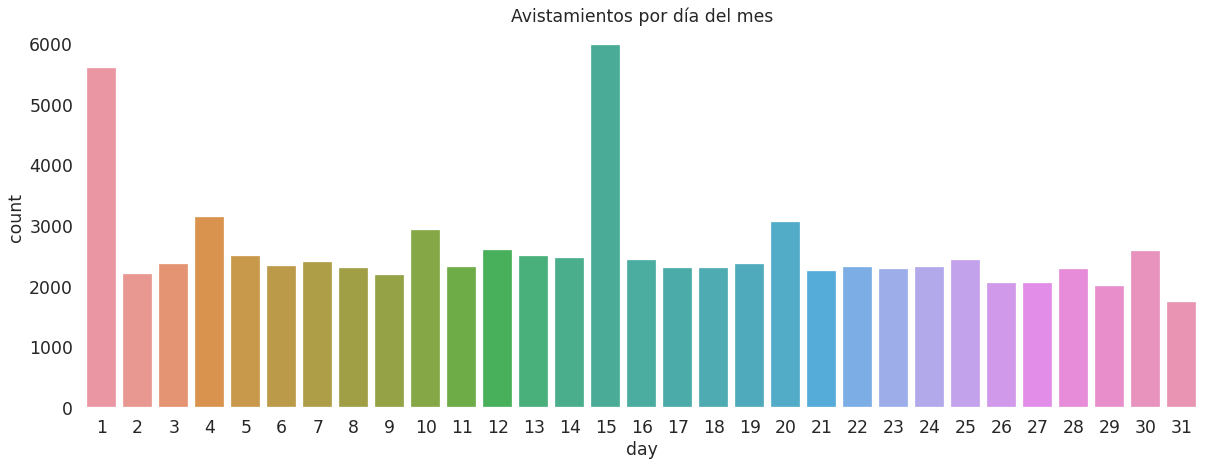

In [14]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['day'])
plt.title('Avistamientos por día del mes')
plt.show()

Claramente en los días 1 y 15 del mes aumenta la actividad. No se me ocurre por qué podría ser

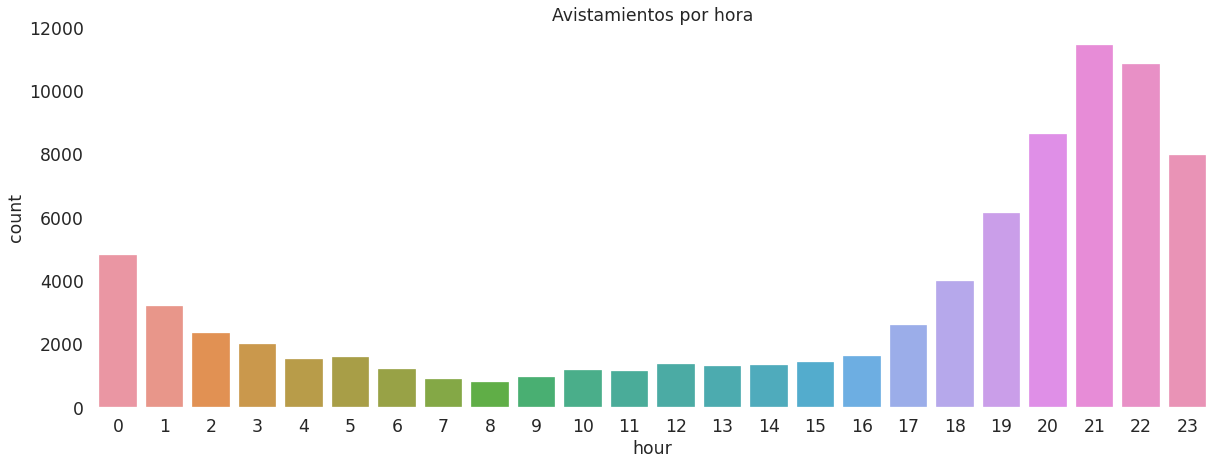

In [15]:
plt.figure(figsize=(20,7))
sns.countplot(x=data['hour'])
plt.title('Avistamientos por hora')
plt.show()

Esto tiene sentido, a medida que va cayendo la noche, los avistamientos son más comunes. <br>
A las 21hs es cuando más ovnis se ven  
A partir de las 23hs descienden los avistamientos

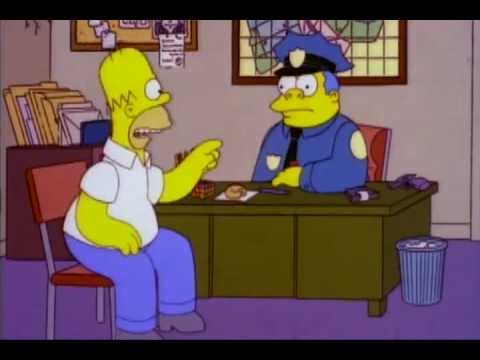

In [16]:
YouTubeVideo('mVZN_movUQo', width=800, height=450)

# Ese video de los simpsons me hizo pensar algo. ¿Los ovnis aparecen más algun dia de la semana que otro?

In [17]:
data['dayofweek'] = pd.DatetimeIndex(data['datetime']).dayofweek
data['dayofweek'] = data['dayofweek'].astype('str')
data['dayofweek'] = data['dayofweek'].replace({'0': 'Lunes','1':'Martes','2':'Miercoles','3':'Jueves','4':'Viernes','5':'Sabado','6':'Domingo'}, regex=True)

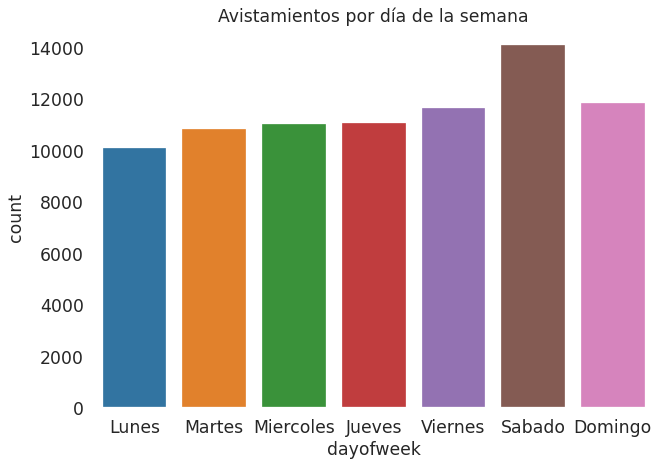

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['dayofweek'],order=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])
plt.title('Avistamientos por día de la semana')
plt.show()

Bueno en este caso el día de la semana en que más registros hay es el sabado

**************************

******************

![The kaggle logo][2]
[2]: https://postercity.com.ar/wp-content/uploads/2017/07/I-Want-To-Believe.jpg

# ****Avistamientos por localización****

In [19]:
import plotly.graph_objs as go
import plotly.offline as py

# En todo el mundo

Obviamente al ser casi todos los registros de Estados Unidos, los demás países no van a quedar muy representados. 

In [20]:
countries = data["country"].value_counts().index #lista de paises
countries_ratio = data["country"].value_counts().values #frecuencia
countries = [i.upper() for i in countries]

In [21]:
datadict = [
        dict(
        type='choropleth',
        locations = countries,
        z = countries_ratio,
        locationmode = 'country names', #"ISO-3" | "USA-states" | "country names" | "geojson-id"
        text = "avistamientos",
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Avistamientos por paises",
     )
        )
        ]

layout = dict(
        title = 'Avistamientos en todo el mundo',
        geo = dict(
            scope='world', #scope del mapa "world" | "usa" | "europe" | "asia" | "africa" | "north america" | "south america" 
            projection=dict( type='orthographic' ), # equirectangular | robinson | orthographic |
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
              )


fig = go.Figure(data=datadict, layout=layout)
py.iplot(fig)

#https://plotly.com/python/reference/

# En Sudamerica

In [22]:
SudAmerica =  data[(data.country == "Colombia") | (data.country == "Venezuela")| (data.country == "Argentina")| (data.country == "Chile")| (data.country == "Uruguay")| (data.country == "Paraguay")| (data.country == "Brazil")| (data.country == "Bolivia (Plurinational State of)")| (data.country == "Ecuador")| (data.country == "Guyana")| (data.country == "Peru")| (data.country == "Suriname")]['country']

In [23]:
countries_SA = SudAmerica.value_counts().index #que estados
countries_SA_ratio = SudAmerica.value_counts().values #cuanto aparece cada estad
countries_SA = [i.upper() for i in countries_SA]
                  

In [24]:
datadict = [
        dict(
        type='choropleth',
        locations = countries_SA,  
        z = countries_SA_ratio,  
        locationmode = 'country names', #"ISO-3" | "USA-states" | "country names" | "geojson-id"
        text = "avistamientos",
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)', #color de los limites de los paises (255 255 255 = blanco)
                width = 2
            ) ),
        colorbar = dict(
            title = "Avistamientos por paises",
    )
        )
        ]

layout = dict(
        title = 'Avistamientos en America del sur',
        geo = dict(
            scope='south america', #scope del mapa "world" | "usa" | "europe" | "asia" | "africa" | "north america" | "south america" 
            projection=dict( type='equirectangular' ), # equirectangular | robinson | orthographic |
            showlakes = True,
            lakecolor = 'rgb(255, 255,255)'), #color de los lagos
              )


fig = go.Figure(data=datadict, layout=layout)
py.iplot(fig)

#https://plotly.com/python/reference/

# En provincias argentinas

In [25]:
provinciasArgentinas = data[data.country == "Argentina"]["state"].value_counts().index
provinciasArgentinas_ratio = data[data.country == "Argentina"]["state"].value_counts().values

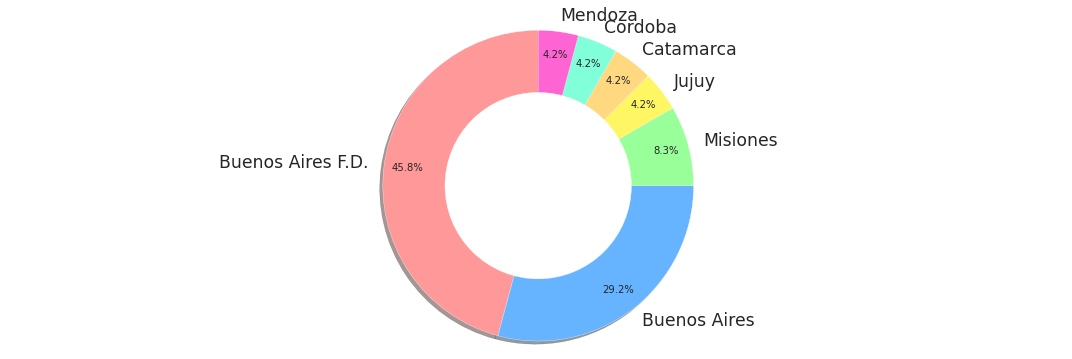

In [26]:
labels = provinciasArgentinas
sizes = provinciasArgentinas_ratio
colors = ['#ff9999','#66b3ff','#99ff99','#FFF664','#FFD880','#80FFD8','#FF64D3']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors,pctdistance=0.85,
        shadow=True, startangle=90)

#draw internal circle
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

In [27]:
#creo un nuevo dataframe solo de argentina
#lo ordeno
#le parametrizo el tamaño de la fila
data[data.country == "Argentina"][['datetime','state','city','duration(minutes)','shape','comments']].sort_values(by=['datetime']).style.set_properties(subset=['comments'], **{'width': '500px','height': '50px'})

,datetime,state,city,duration(minutes),shape,comments
48579,1952-06-15 00:00:00,Catamarca,San Fernando del Valle de Catamarca,10.000000,cigar,I was camping with my school at Piedra Blanka in Los Padres National Forest. We all slept in sleeping bags jus out under the stars. No
60731,1976-07-30 20:00:00,Buenos Aires,Moron,1440.000000,oval,Three pilot crews from 3 different airlines observed and confirmed seeing an unidentified flying object.
47298,1980-06-01 21:00:00,Buenos Aires F.D.,Buenos Aires,5.000000,No data,Buenos Aires triangle
42460,1999-05-15 22:00:00,Buenos Aires F.D.,Buenos Aires,0.083333,other,Donuts over Buenos Aires /Argentina
72810,2000-09-10 23:00:00,Misiones,Eldorado,0.750000,egg,I SAW TWO UFOS CHASING EACH OTHER & STOP IN MID AIR! this is not the first ones i saw !.got witnesses
24708,2002-01-05 20:00:00,Buenos Aires F.D.,Buenos Aires,0.166667,light,"Rare "" star"""
19993,2002-12-23 22:30:00,Buenos Aires,Mar del Tuyu,5.000000,other,"We saw an U.F.O in "" Costa del este"" Argentina...12/23/02...near the beach"
28518,2003-02-25 22:30:00,Buenos Aires F.D.,Buenos Aires,0.066667,chevron,Orange Chevron shaped.
65043,2003-08-01 02:10:00,Mendoza,San Rafael,2.000000,circle,"Argentinian Circular Craft, multiple lights and witnesses."
4033,2003-10-23 23:15:00,Buenos Aires F.D.,Buenos Aires,0.750000,oval,eran dos ovalos de color negro mate.direccion n/este hacia el sur/este se intercalaban es decir primero iba una y luego la pasaba la ot


**24 registros en más de 100 años... obviamente esto es lo registrado por la NUFORC, que es de otro pais.<br>
Estaria bueno obtener datos de algun organismo de acá**

*******************

***********************

<img src="https://i.pinimg.com/originals/a5/42/48/a5424852abc98df69ebd4b4e366e1b6f.gif">

# ****Más preguntas****

# Palabras más usadas por quienes reportaron

Algo super interesante que vi en este notebook:
https://www.kaggle.com/enginacikgoz/ufo-sightings-analysis <br>
Una nube de palabras, en donde vemos las más utilizadas por quienes reportaron los avistamientos

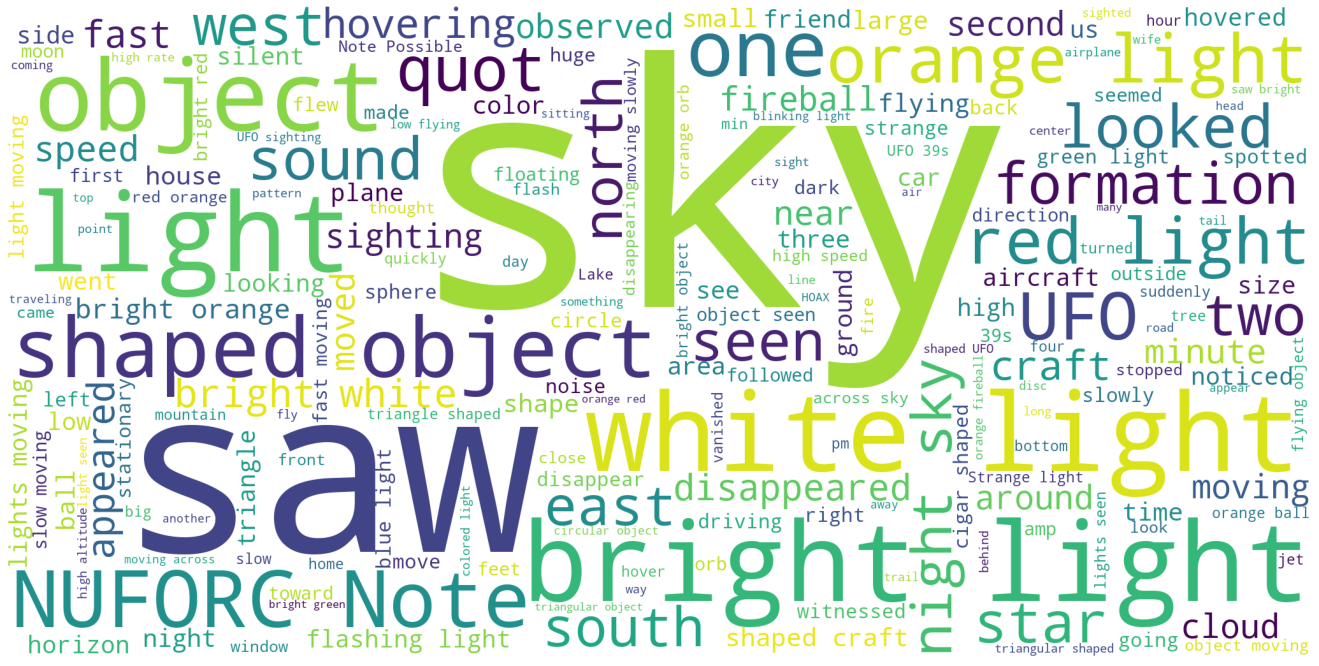

In [28]:
from wordcloud import WordCloud
words = [i for i in data.comments]
    
words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='white',
                          width=2048,
                          height=1024
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

Se ve mucho palabras como (en español): luces, cielo, brillo, volador, nave, forma.

# ¿Cuales son las formas de OVNI avistadas más comunes?

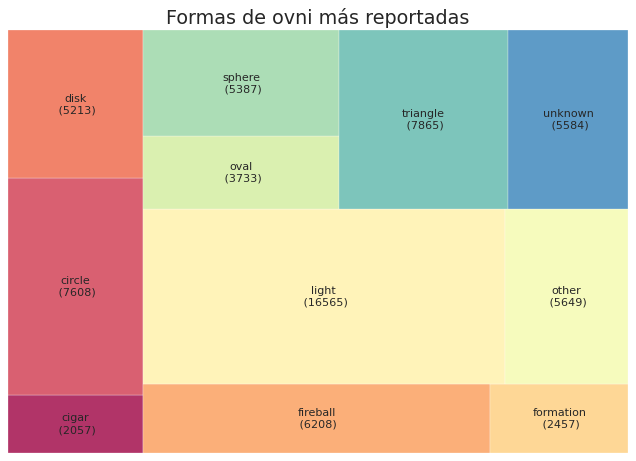

In [29]:
#filtro los datos para que el grafico tenga más sentido. Solo voy a mostrar las formas que tengan al menos 2000 registros
data_treemap = data.groupby("shape").filter(lambda x: len(x) > 2000)

# Prepare Data
df = data_treemap.groupby('shape').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,7), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Formas de ovni más reportadas')
plt.axis('off')
plt.show()

# **Conclusiones**

* Los cantidad de avistamientos es altamente influenciada por eventos famosos relacionados de alguna forma al fenomeno ovni. Por ejemplo en 1947 ocurrio el incidente Roswell, y los casos se triplicaron respecto al año anterior
* El mes de julio es donde por lo general más reportes hay
* La mayoria de avistamientos ocurren a la noche
* Las palabras más utilizadas para describir el encuentro: sky, bright, object, night, light, shaped
* Las formas de ovni varian: ovalos, luces, triangulos, esferas, discos

This is called a neuralizer

![The kaggle logo][2]
[2]: https://lamenteesmaravillosa.com/wp-content/uploads/2014/02/hombres-de-negro.jpg